In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [92]:
df=pd.read_csv('final_train.csv')

In [93]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,1.00,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,0.98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250
4,BAMS,20 years experience,1.00,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [94]:
df.tail()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
5956,"MBBS, MS - ENT",19 years experience,0.98,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,0.97,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,0.90,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100
5960,"BDS, MDS - Orthodontics",17 years experience,1.00,"Pitampura, Delhi",Dentist,Acrylic Partial Denture Crowns and Bridges Fix...,200


In [95]:
df.shape

(5961, 7)

In [96]:
df.dtypes

Qualification          object
Experience             object
Rating                float64
Place                  object
Profile                object
Miscellaneous_Info     object
Fees                    int64
dtype: object

In [97]:
df.shape

(5961, 7)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Qualification       5961 non-null   object 
 1   Experience          5961 non-null   object 
 2   Rating              2659 non-null   float64
 3   Place               5936 non-null   object 
 4   Profile             5961 non-null   object 
 5   Miscellaneous_Info  3341 non-null   object 
 6   Fees                5961 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 326.1+ KB


In [99]:
df.isnull()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,True,False,False,True,False
3,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
5956,False,False,False,False,False,False,False
5957,False,False,True,False,False,True,False
5958,False,False,False,False,False,False,False
5959,False,False,False,False,False,False,False


In [100]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

 Null values present in Rating,Place,Miscellaneous_Info.

In [101]:
df.dtypes

Qualification          object
Experience             object
Rating                float64
Place                  object
Profile                object
Miscellaneous_Info     object
Fees                    int64
dtype: object

In [102]:
df.shape

(5961, 7)

In [103]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='most_frequent')
df['Rating']=imp.fit_transform(df['Rating'].values.reshape(-1,1))
df['Place']=imp.fit_transform(df['Place'].values.reshape(-1,1))
df['Miscellaneous_Info']=imp.fit_transform(df['Miscellaneous_Info'].values.reshape(-1,1))


In [104]:
df.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
Fees                  0
dtype: int64

In [105]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,1.00,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,0.98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,1.00,"Mathikere - BEL, Bangalore",ENT Specialist,Acrylic Partial Denture Crowns and Bridges Fix...,300
3,"BSc - Zoology, BAMS",12 years experience,1.00,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250
4,BAMS,20 years experience,1.00,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


we need to change string variable into numerical value.

In [107]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

le=LabelEncoder()
ohe=OneHotEncoder()
df['Qualification']=le.fit_transform(df['Qualification'])
df['Experience']=le.fit_transform(df['Experience'])
df['Place']=le.fit_transform(df['Place'])
df['Profile']=le.fit_transform(df['Profile'])
df['Miscellaneous_Info']=le.fit_transform(df['Miscellaneous_Info'])



In [108]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,401,16,1.00,299,5,130,100
1,73,3,0.98,866,0,1422,350
2,1135,63,1.00,457,3,1595,300
3,464,3,1.00,68,0,1695,250
4,10,12,1.00,337,0,253,250


In [109]:
df.shape

(5961, 7)

In [110]:
df.describe()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,596.857574,23.010904,0.976106,414.368059,2.441872,1573.344238,307.944640
std,413.842446,20.937163,0.058815,258.547684,1.658014,640.388401,190.920373
min,0.000000,0.000000,0.070000,0.000000,0.000000,0.000000,5.000000
25%,219.000000,6.000000,0.980000,197.000000,1.000000,1477.000000,150.000000
50%,596.000000,15.000000,1.000000,407.000000,2.000000,1595.000000,300.000000
75%,943.000000,36.000000,1.000000,628.000000,4.000000,1746.000000,500.000000
max,1419.000000,63.000000,1.000000,876.000000,5.000000,2997.000000,950.000000


skewness present in Experience,Place,Profile and Fees.
outliers present Qualification,Experience,Place,Miscellaneous_Info and Fees.

In [111]:
df_cor=df.corr()
df_cor

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
Qualification,1.000000,0.003325,-0.163692,0.006640,0.393123,-0.132786,0.263214
Experience,0.003325,1.000000,0.065753,0.001328,-0.032711,0.035957,-0.048529
Rating,-0.163692,0.065753,1.000000,0.031443,-0.047013,0.286558,-0.154713
Place,0.006640,0.001328,0.031443,1.000000,0.019529,0.027901,-0.052505
Profile,0.393123,-0.032711,-0.047013,0.019529,1.000000,-0.155324,0.145226
Miscellaneous_Info,-0.132786,0.035957,0.286558,0.027901,-0.155324,1.000000,-0.060715
Fees,0.263214,-0.048529,-0.154713,-0.052505,0.145226,-0.060715,1.000000


Fees is highly correlate with Qualification.
Fees is least correlate  with Rating.

<AxesSubplot:>

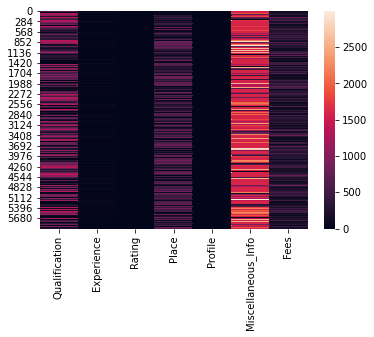

In [112]:
sns.heatmap(df)

No null values present.

<AxesSubplot:>

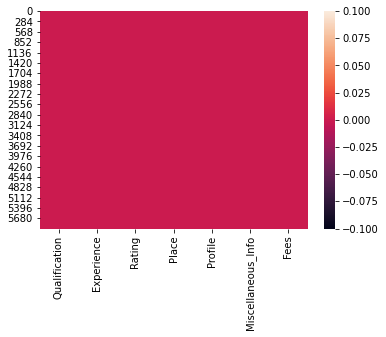

In [113]:
sns.heatmap(df.isnull())

No Null values present.

<AxesSubplot:>

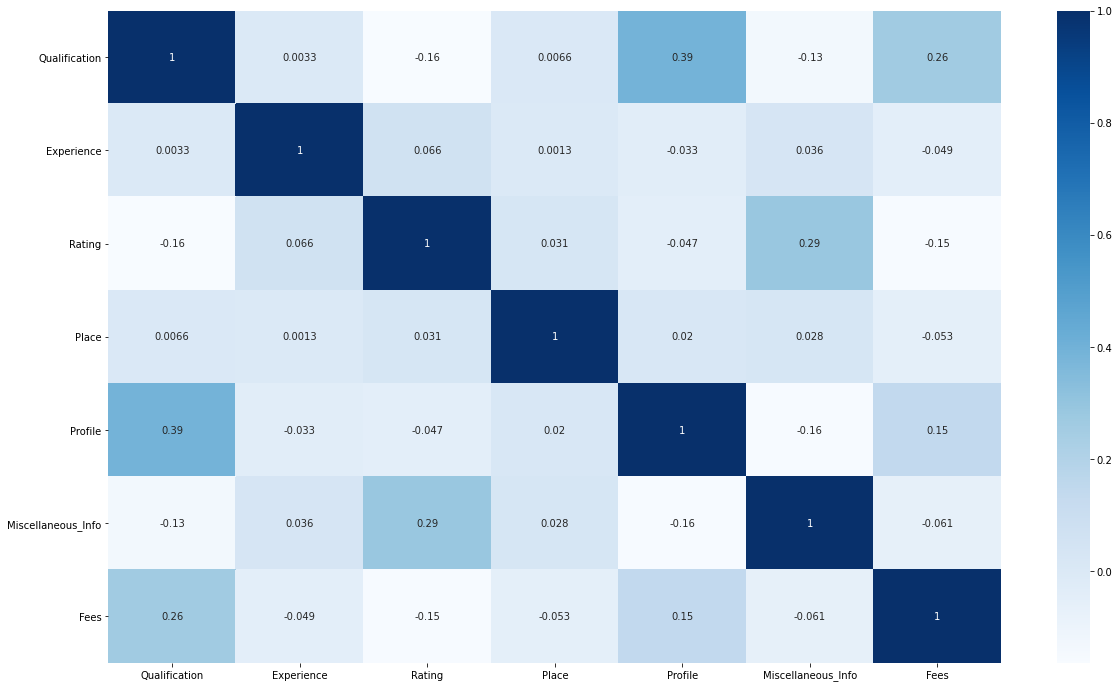

In [114]:
plt.figure(figsize=(20,12))
sns.heatmap(df_cor,cmap='Blues',annot=True)

Fees is highly correlate with Qualification.
Fees is least correlate  with Rating.

<AxesSubplot:>

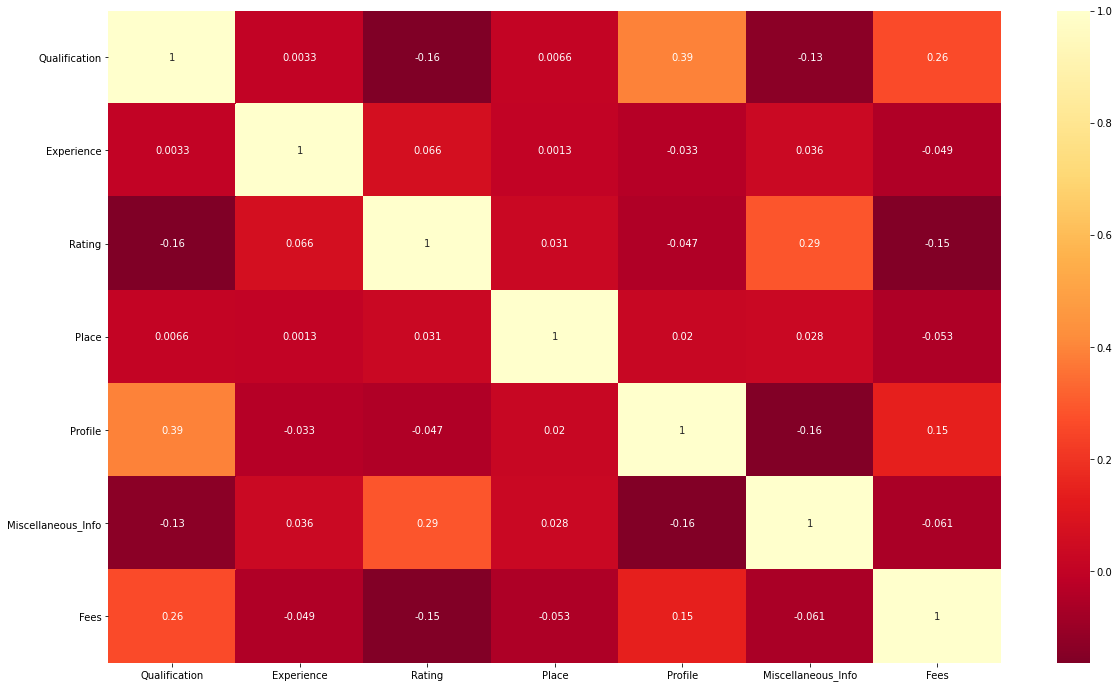

In [115]:
plt.figure(figsize=(20,12))
sns.heatmap(df_cor,cmap='YlOrRd_r',annot=True)

Fees is highly correlate with Qualification.
Fees is least correlate  with Rating.

In [116]:
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

<AxesSubplot:xlabel='Qualification', ylabel='Density'>

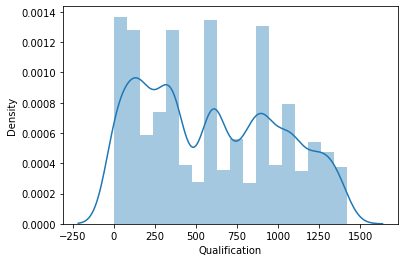

In [117]:
sns.distplot(df['Qualification'])

 skewness present.

<AxesSubplot:xlabel='Experience', ylabel='Density'>

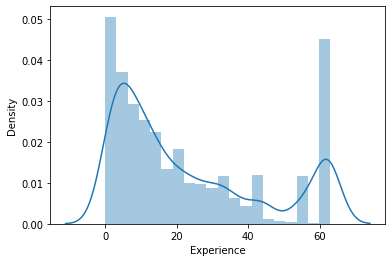

In [118]:
sns.distplot(df['Experience'])

 skewness present.

<AxesSubplot:xlabel='Rating', ylabel='Density'>

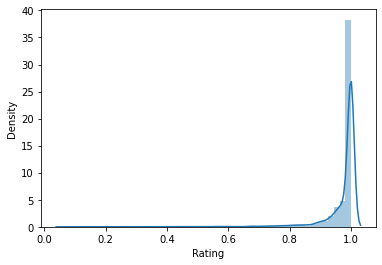

In [119]:
sns.distplot(df['Rating'])

skewness present.

<AxesSubplot:xlabel='Place', ylabel='Density'>

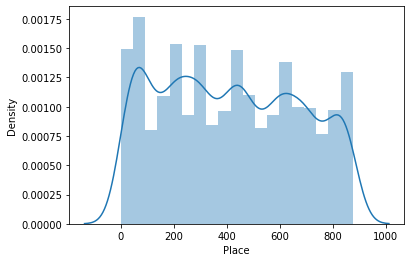

In [120]:
sns.distplot(df['Place'])

 skewness present.

<AxesSubplot:xlabel='Profile', ylabel='Density'>

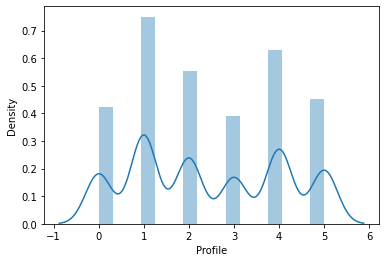

In [121]:
sns.distplot(df['Profile'])

 Skewness present.

<AxesSubplot:xlabel='Miscellaneous_Info', ylabel='Density'>

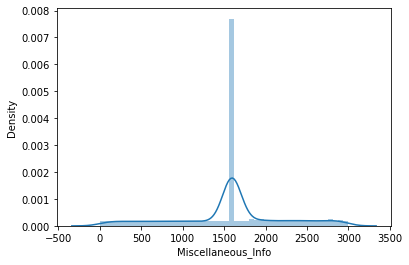

In [122]:
sns.distplot(df['Miscellaneous_Info'])

 Skewness present.

<AxesSubplot:xlabel='Fees', ylabel='Density'>

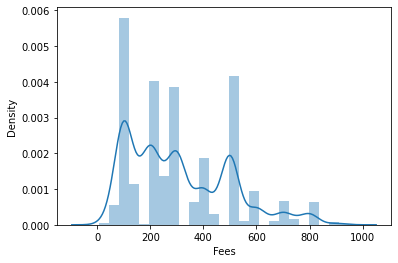

In [123]:
sns.distplot(df['Fees'])

Skewness present.

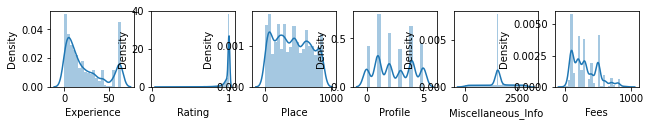

In [124]:
collist=df.columns.values
ncol=14
nrows=15
plt.figure(figsize=(25,25))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

In [125]:
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

<AxesSubplot:xlabel='Fees', ylabel='Qualification'>

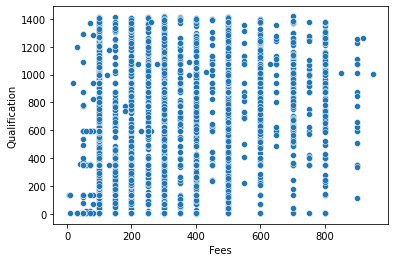

In [126]:
sns.scatterplot(x='Fees',y='Qualification',data=df)

Qualification is spreaded in 0 to 1400 range.

<AxesSubplot:xlabel='Fees', ylabel='Experience'>

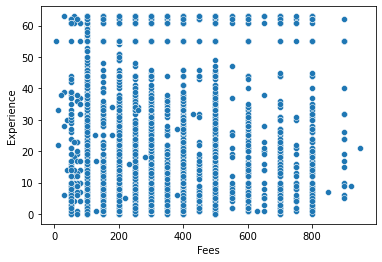

In [127]:
sns.scatterplot(x='Fees',y='Experience',data=df)


Experience is spreaded from 0 to 60 range.

<AxesSubplot:xlabel='Fees', ylabel='Rating'>

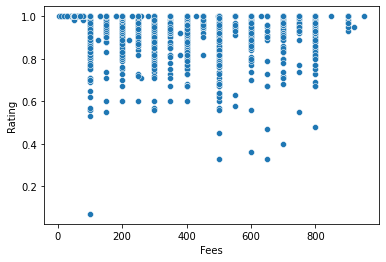

In [128]:
sns.scatterplot(x='Fees',y='Rating',data=df)


Rating is spreaded from 0 to 1 range.

<AxesSubplot:xlabel='Fees', ylabel='Place'>

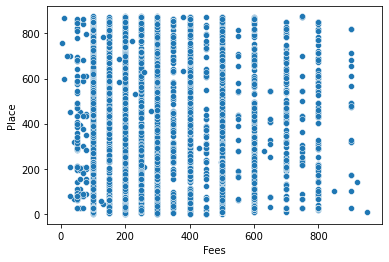

In [129]:
sns.scatterplot(x='Fees',y='Place',data=df)


Place is spreaded from 0 to 800 range.

<AxesSubplot:xlabel='Fees', ylabel='Profile'>

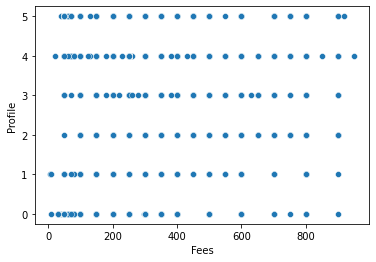

In [130]:
sns.scatterplot(x='Fees',y='Profile',data=df)


Profile is spreaded from 0 to 5 range.

<AxesSubplot:xlabel='Fees', ylabel='Miscellaneous_Info'>

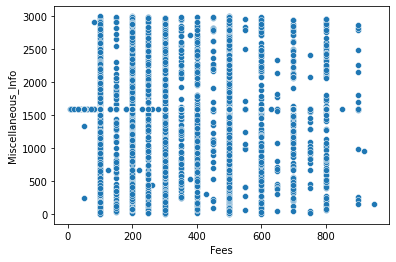

In [131]:
sns.scatterplot(x='Fees',y='Miscellaneous_Info',data=df)


Miscellaneous_Info is spreaded from 0 to 3000 range.

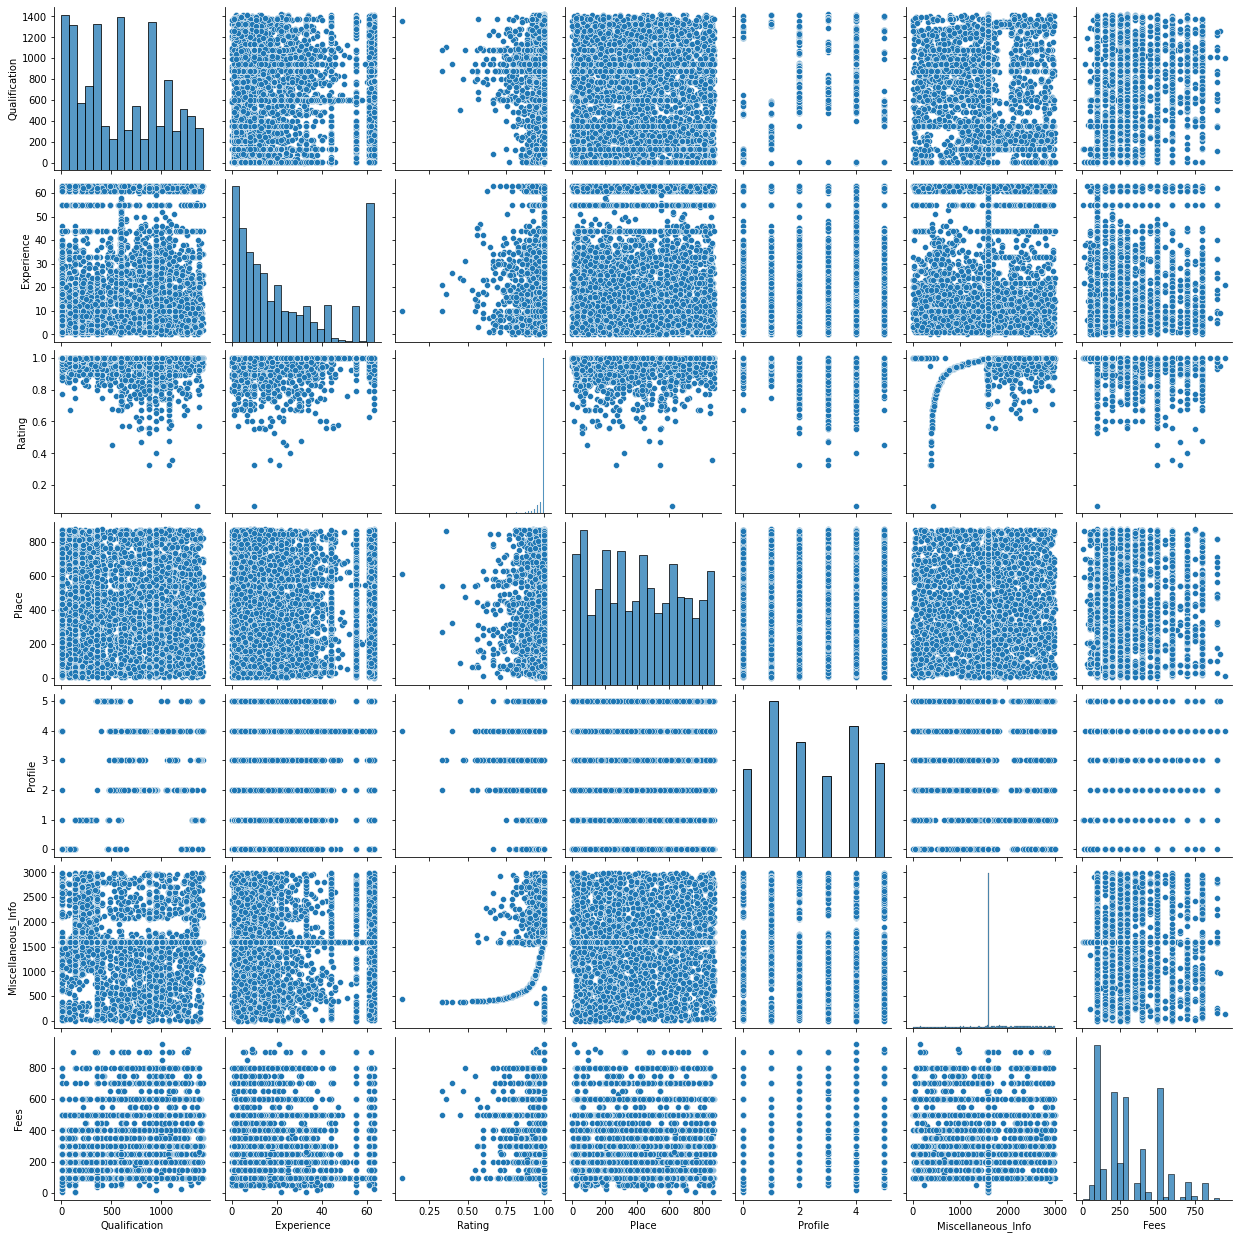

In [132]:
sns.pairplot(df)

In [133]:
df.dtypes

Qualification           int32
Experience              int32
Rating                float64
Place                   int32
Profile                 int32
Miscellaneous_Info      int32
Fees                    int64
dtype: object

In [134]:
df.skew()

Qualification         0.239720
Experience            0.823531
Rating               -4.701646
Place                 0.124862
Profile               0.108803
Miscellaneous_Info   -0.218460
Fees                  0.751870
dtype: float64

skewness present in Rating and Experiece.

# Removing Skewness

In [135]:
df['Rating']=np.log1p(df['Rating'])

In [136]:
df.skew()

Qualification         0.239720
Experience            0.823531
Rating               -5.540374
Place                 0.124862
Profile               0.108803
Miscellaneous_Info   -0.218460
Fees                  0.751870
dtype: float64

In [137]:
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

<AxesSubplot:>

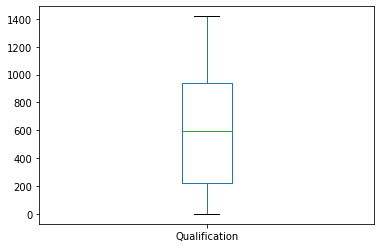

In [138]:
df['Qualification'].plot.box()

 NO outliers present.

<AxesSubplot:>

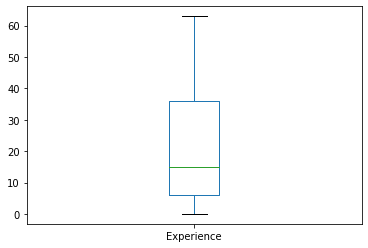

In [139]:
df['Experience'].plot.box()

 No outliers present.

<AxesSubplot:>

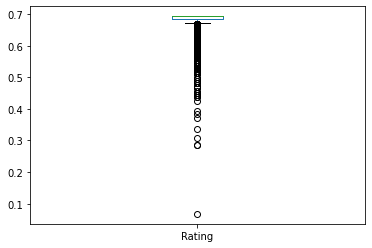

In [140]:
df['Rating'].plot.box()

outliers present.

<AxesSubplot:>

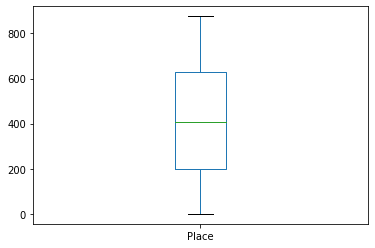

In [141]:
df['Place'].plot.box()

No outliers present.

<AxesSubplot:>

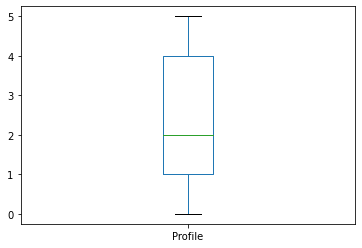

In [142]:
df['Profile'].plot.box()

No outliers present.

<AxesSubplot:>

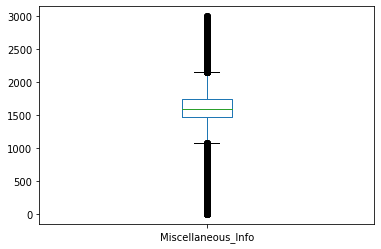

In [143]:
df['Miscellaneous_Info'].plot.box()

 outliers present.

<AxesSubplot:>

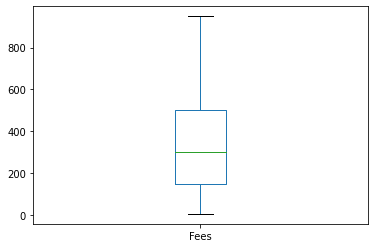

In [144]:
df['Fees'].plot.box()

No outliers present.

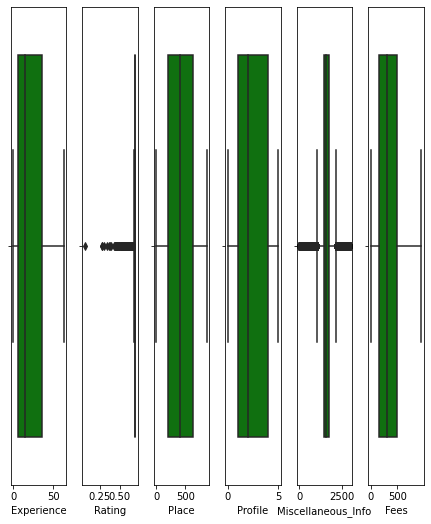

In [145]:
collist=df.columns.values
ncol=12
nrows=10
plt.figure(figsize=(ncol,6*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

Outliers present in Rating and Miscellaneous_Info.

In [146]:
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [147]:
df.dtypes

Qualification           int32
Experience              int32
Rating                float64
Place                   int32
Profile                 int32
Miscellaneous_Info      int32
Fees                    int64
dtype: object

# Removing Outliers

In [148]:
from scipy.stats import zscore
z=np.abs(zscore(df[['Rating']]))
print(np.where(z>3))

(array([  18,   55,   67,  140,  178,  209,  309,  333,  377,  458,  465,
        585,  590,  632,  692,  731,  787,  788,  810,  815,  851,  911,
        918,  968,  979,  990,  998, 1016, 1018, 1170, 1240, 1303, 1392,
       1425, 1433, 1437, 1444, 1475, 1592, 1594, 1614, 1635, 1648, 1717,
       1741, 1743, 1747, 1778, 1796, 1852, 1877, 1937, 2089, 2161, 2277,
       2309, 2323, 2391, 2478, 2500, 2548, 2585, 2646, 2670, 2715, 2726,
       2738, 2758, 2829, 2833, 2962, 2991, 3093, 3120, 3126, 3144, 3222,
       3254, 3270, 3295, 3333, 3367, 3463, 3526, 3537, 3593, 3604, 3615,
       3627, 3661, 3676, 3690, 3766, 3783, 3820, 3861, 4052, 4055, 4058,
       4135, 4174, 4212, 4219, 4459, 4474, 4478, 4509, 4608, 4609, 4612,
       4808, 4825, 4843, 4851, 4880, 4971, 5028, 5127, 5244, 5249, 5262,
       5298, 5316, 5351, 5422, 5461, 5502, 5523, 5531, 5612, 5615, 5636,
       5647, 5663, 5840, 5862, 5892, 5929], dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [149]:
z[55][0]

11.542714950583772

In [150]:
z[140][0]

3.920772428607146

In [151]:
df1=df[(z<3).all(axis=1)]

In [152]:
df1.shape

(5823, 7)

In [153]:
df.shape

(5961, 7)

5961-5858=103 outliers are removed from Dataframe.

In [154]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,401,16,0.693147,299,5,130,100
1,73,3,0.683097,866,0,1422,350
2,1135,63,0.693147,457,3,1595,300
3,464,3,0.693147,68,0,1695,250
4,10,12,0.693147,337,0,253,250


In [155]:
x=df.iloc[:,0:-1]




In [156]:
x

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,401,16,0.693147,299,5,130
1,73,3,0.683097,866,0,1422
2,1135,63,0.693147,457,3,1595
3,464,3,0.693147,68,0,1695
4,10,12,0.693147,337,0,253
...,...,...,...,...,...,...
5956,1075,10,0.683097,70,3,1385
5957,596,26,0.693147,541,4,1595
5958,596,35,0.678034,216,4,1173
5959,943,6,0.641854,850,4,2202


In [157]:
y=df.iloc[:,6]

In [158]:
y

0       100
1       350
2       300
3       250
4       250
       ... 
5956    300
5957    100
5958    600
5959    100
5960    200
Name: Fees, Length: 5961, dtype: int64

In [159]:
def get_score(model):

    max_i=0
    max_score=0


    for i in range(1,200):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=i)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        acc= r2_score(y_test,pred)
        #print("accuracy score",acc)

        if(acc > max_score):
            max_score=acc
            max_i=i
    print("max r2 score",max_score)
    print("max i",max_i)
    print("mean squared error:",mean_squared_error(y_test,pred))
    print("mean absolute error:",mean_absolute_error(y_test,pred))
    print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))


In [160]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)
lr=LinearRegression()
get_score(lr)

max r2 score 0.10742964273522138
max i 39
mean squared error: 32989.69348133356
mean absolute error: 147.36306255429147
Root mean squared error: 181.63065127156693


In [161]:
lr.coef_

array([ 1.10855644e-01, -3.40561615e-01, -7.77414966e+02, -4.08912069e-02,
        6.45896387e+00,  3.80340602e-03])

In [162]:
lr.intercept_

774.6844864879937

# Regularization :: L1 and L2 Regularization¶

In [163]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso(alpha=.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.08084667068747586

In [164]:
ls.coef_

array([ 9.99122458e-02, -2.71801288e-01, -6.87461764e+02, -3.64332172e-02,
        5.73639306e+00,  5.12609906e-03])

In [165]:
rd=Ridge(alpha=.0001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.0808466709752651

In [166]:
from sklearn.linear_model import ElasticNet
et=ElasticNet(alpha=.0001)
et.fit(x_train,y_train)
pred=et.predict(x_test)
print(et.score(x_train,y_train))
et.coef_

0.0808151192475407


array([ 1.00307546e-01, -2.75301726e-01, -6.51990162e+02, -3.65082909e-02,
        5.70469451e+00,  4.65705726e-03])

# Cross Validation

In [167]:
score=cross_val_score(lr,x,y,cv=7)
print(score)
print(score.mean(),score.std())

[0.07093415 0.09833131 0.06577751 0.08339967 0.08816025 0.07520961
 0.10662397]
0.08406235306476359 0.013705668995956542


# Ensemble Techniques

In [168]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(r2_score(y_test,predrf))
print(mean_squared_error(y_test,predrf))


0.16207409852269883
29901.005573362603


In [169]:
from sklearn.ensemble import AdaBoostRegressor

ab=AdaBoostRegressor(n_estimators=100,random_state=42)
#by default n_estimators=100
ab.fit(x_train,y_train)
predab=ab.predict(x_test)
print(r2_score(y_test,predab))
print(mean_squared_error(y_test,predab))

0.09935328238872398
32139.16943663666


# Saving the model

In [170]:
import joblib
joblib.dump(lr,'doctor.obj')

['doctor.obj']

In [171]:
file=joblib.load('doctor.obj')
file.predict(x_test)

array([231.05367231, 381.16564313, 363.1856675 , ..., 333.70387884,
       362.54788765, 351.93675669])